grid of mod std vs obs std plots. horizontal = frequency band; vertical = variable

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
import pandas as pd
from Tools import commonfxns as cf, OAPBuoyData as OAP, mplRC, OAPBuoyComp as bc,viz, evalfxns as ev, \
    frequencyBands as fb
import netCDF4 as nc
import cftime
import datetime as dt
import cmocean
import gsw
#from sklearn.linear_model import TheilSenRegressor
import pickle
import os
import matplotlib as mpl
from IPython.display import Markdown, display, HTML
import astropy.timeseries as apt
from collections import OrderedDict
import warnings
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

mplRC.paperRC2()

In [2]:
# need to add hplus
varlist=['tos','sos','phos','spco2','o2os','chlos'] # need to add ,'hplus'
Tvec=[7,31,365]
freq='daily'

In [3]:
unitconvfac={'tos':1,'sos':1,'phos':1,'spco2':1/0.101325,'chlos':1e6,'o2os':1e6/1023}# o2os here approximates rho

In [4]:
fb.bxfbase

'/work/ebo/calcs/buoyCompTS/bxfs/'

In [5]:
fb.bxfbase+f"bxf_df.{'_'.join([str(el) for el in Tvec])}.{freq}.csv"

'/work/ebo/calcs/buoyCompTS/bxfs/bxf_df.7_31_365.daily.csv'

In [6]:
df=pd.read_csv(fb.bxfbase+f"bxf_df.{'_'.join([str(el) for el in Tvec])}.{freq}.csv")

In [7]:
df.keys()

Index(['Unnamed: 0', 'ivar', 'datasetID', 'var_1_7_obs', 'var_7_31_obs',
       'var_31_365_obs', 'var_g365_obs', 'var_total_obs', 'vards_1_7_obs',
       'vards_7_31_obs', 'vards_31_365_obs', 'vards_g365_obs',
       'vards_total_obs', 'var_seas_obs', 'var_b_seas_obs', 'var_b_1_7_obs',
       'var_b_7_31_obs', 'var_b_31_365_obs', 'var_b_g365_obs',
       'var_b_total_obs', 'vards_b_1_7_obs', 'vards_b_7_31_obs',
       'vards_b_31_365_obs', 'vards_b_g365_obs', 'vards_b_total_obs',
       'var_1_7_mod', 'var_7_31_mod', 'var_31_365_mod', 'var_g365_mod',
       'var_total_mod', 'vards_1_7_mod', 'vards_7_31_mod', 'vards_31_365_mod',
       'vards_g365_mod', 'vards_total_mod', 'var_seas_mod', 'var_1_7_obs_N',
       'var_7_31_obs_N', 'var_31_365_obs_N', 'var_g365_obs_N',
       'var_total_obs_N', 'vards_1_7_obs_N', 'vards_7_31_obs_N',
       'vards_31_365_obs_N', 'vards_g365_obs_N', 'vards_total_obs_N',
       'var_seas_obs_N', 'var_b_seas_obs_N', 'var_b_1_7_obs_N',
       'var_b_7_31_obs_N

In [8]:
df['seas2']=np.nan
df['resid2']=np.nan
seas=dict()
resid=dict()
for ivar in varlist:
    vpath=f'/work/ebo/calcs/extremes/bcfitvar/bcfitvar.presentday.{ivar}.nc'
    with nc.Dataset(vpath) as f:
        seas[ivar]=f.variables['var_seas'][:]*unitconvfac[ivar]**2
        resid[ivar]=f.variables['var_dtds'][:]*unitconvfac[ivar]**2
    stas=np.squeeze(df.loc[df.ivar==ivar,['datasetID']])
    for ista in stas:
        jj,ii=np.squeeze(df.loc[(df.ivar==ivar)&(df.datasetID==ista),['jj','ii']])
        df.loc[(df.ivar==ivar)&(df.datasetID==ista),['seas2']]=seas[ivar][jj,ii]
        df.loc[(df.ivar==ivar)&(df.datasetID==ista),['resid2']]=resid[ivar][jj,ii]

In [9]:
test=bc.loadStats(merged=True,path='/work/ebo/calcs/buoyCompTS/presentday/comps/')

In [10]:
from Tools import diagsPP

In [11]:
iscen,yrspan = diagsPP.listScenDates[8]
cpath='/work/Elise.Olson/calcs/buoyCompTS/'+diagsPP.scenNameDict[iscen]+'/comps/'

In [12]:
cpath

'/work/Elise.Olson/calcs/buoyCompTS/ESM4_ssp585_D1/comps/'

In [13]:
test

,datasetID,title,minTime,maxTime,Lat,Lon,tabfile,shortTitle,bias,bias_b,...,lon,mod_opt_coef0,obs_opt_coef0,mod_opt_coef1,obs_opt_coef1,mod_ols_coef0,obs_ols_coef0,mod_ols_coef1,obs_ols_coef1,obs_N
0,pmel_co2_moorings_ba50_a09b_5565,Iceland NOAA Surface Ocean CO2 and Ocean Acidi...,2013-08-16T10:47:00Z,2017-06-28T18:17:00Z,68.0,-12.67,ICELAND.txt,Iceland,NaN,-0.628595,...,-12.67,1.278484e+00,NaN,1.161214e-04,NaN,1.277630e+00,NaN,1.162189e-04,NaN,805
1,pmel_co2_moorings_ba50_a09b_5565,Iceland NOAA Surface Ocean CO2 and Ocean Acidi...,2013-08-16T10:47:00Z,2017-06-28T18:17:00Z,68.0,-12.67,ICELAND.txt,Iceland,NaN,-0.022990,...,-12.67,3.445840e+01,NaN,1.714497e-05,NaN,3.445844e+01,NaN,1.714001e-05,NaN,805
2,pmel_co2_moorings_ba50_a09b_5565,Iceland NOAA Surface Ocean CO2 and Ocean Acidi...,2013-08-16T10:47:00Z,2017-06-28T18:17:00Z,68.0,-12.67,ICELAND.txt,Iceland,NaN,NaN,...,-12.67,8.191538e+00,NaN,-6.318435e-06,NaN,8.191538e+00,NaN,-6.318469e-06,NaN,71
3,pmel_co2_moorings_ba50_a09b_5565,Iceland NOAA Surface Ocean CO2 and Ocean Acidi...,2013-08-16T10:47:00Z,2017-06-28T18:17:00Z,68.0,-12.67,ICELAND.txt,Iceland,NaN,-0.007976,...,-12.67,8.191538e+00,NaN,-6.318435e-06,NaN,8.191538e+00,NaN,-6.318469e-06,NaN,803
4,pmel_co2_moorings_ba50_a09b_5565,Iceland NOAA Surface Ocean CO2 and Ocean Acidi...,2013-08-16T10:47:00Z,2017-06-28T18:17:00Z,68.0,-12.67,ICELAND.txt,Iceland,NaN,28.478123,...,-12.67,2.305706e+03,NaN,1.459927e-03,NaN,2.305708e+03,NaN,1.459692e-03,NaN,805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,pmel_co2_moorings_ca69_976d_4677,TAO110W NOAA Surface Ocean CO2 and Ocean Acidi...,2009-09-19T04:28:00Z,2019-07-02T15:17:00Z,0.0,-110.00,TAO110W.txt,TAO110W,5.786224,5.505829,...,-110.00,3.202119e+02,313.213758,4.714366e-03,0.004878,3.202125e+02,312.133105,4.714306e-03,0.004948,1757
933,pmel_co2_moorings_ca69_976d_4677,TAO110W NOAA Surface Ocean CO2 and Ocean Acidi...,2009-09-19T04:28:00Z,2019-07-02T15:17:00Z,0.0,-110.00,TAO110W.txt,TAO110W,NaN,NaN,...,-110.50,9.889336e-07,NaN,1.494018e-13,NaN,9.888984e-07,NaN,1.534213e-13,NaN,1
934,pmel_co2_moorings_ca69_976d_4677,TAO110W NOAA Surface Ocean CO2 and Ocean Acidi...,2009-09-19T04:28:00Z,2019-07-02T15:17:00Z,0.0,-110.00,TAO110W.txt,TAO110W,NaN,NaN,...,-110.50,1.022788e-02,NaN,-8.950943e-09,NaN,1.022684e-02,NaN,-8.833292e-09,NaN,1
935,pmel_co2_moorings_ca69_976d_4677,TAO110W NOAA Surface Ocean CO2 and Ocean Acidi...,2009-09-19T04:28:00Z,2019-07-02T15:17:00Z,0.0,-110.00,TAO110W.txt,TAO110W,NaN,NaN,...,-110.50,2.550035e+00,NaN,-1.516765e-05,NaN,2.550079e+00,NaN,-1.517266e-05,NaN,1


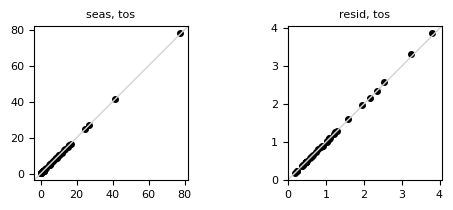

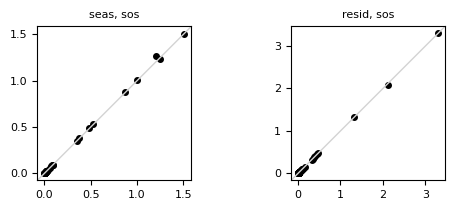

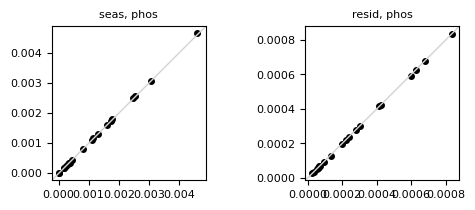

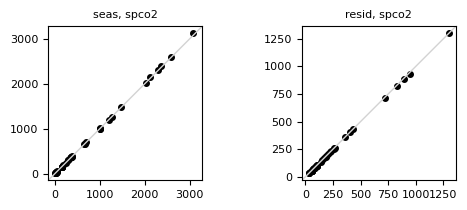

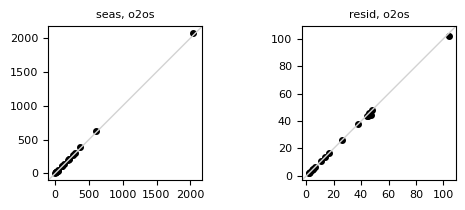

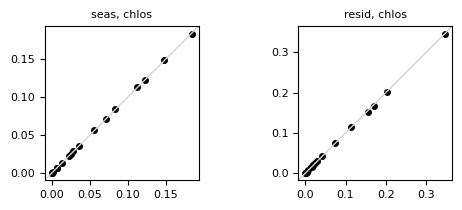

In [14]:
for ivar in varlist:
    fig,ax=plt.subplots(1,2,figsize=(6,2))
    idf=df.loc[df.ivar==ivar]
    ax[0].plot(idf.var_seas_mod,idf.seas2,'k.')
    ax[0].set_title(f'seas, {ivar}')
    ax[1].plot(idf.vards_total_mod,idf.resid2,'k.')
    ax[1].set_title(f'resid, {ivar}')
    for iax in ax:
        viz.squareax(iax)

In [15]:
df['ii_2']=[int(el/2) for el in df['ii']]
df['jj_2']=[int(el/2) for el in df['jj']]

In [16]:
fstatic1x1='/work/Elise.Olson/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_historical_D1/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_daily_1x1deg/ocean_daily_1x1deg.static.nc'
with nc.Dataset(fstatic1x1) as fstat:
    glon=fstat.variables['geolon'][:]
    glat=fstat.variables['geolat'][:]
    deptho=fstat.variables['deptho'][:]
    wet=fstat.variables['wet'][:]
mask=(deptho>0).astype(float)

In [17]:
testcm=LinearSegmentedColormap.from_list('linseg', 
                                             [(0,    'darkorchid'),
                                              (0.25, 'deepskyblue'),
                                              (.45,    'lightseagreen'),
                                              (.55, 'limegreen'),
                                              (.75,'yellow'),
                                              (1, 'orange')], N=256)

In [18]:
shp=np.shape(seas[ivar])
shp

(180, 360)

In [19]:
viz.latvec1x1

masked_array(data=[-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5,
                   -81.5, -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5,
                   -73.5, -72.5, -71.5, -70.5, -69.5, -68.5, -67.5, -66.5,
                   -65.5, -64.5, -63.5, -62.5, -61.5, -60.5, -59.5, -58.5,
                   -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
                   -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5,
                   -41.5, -40.5, -39.5, -38.5, -37.5, -36.5, -35.5, -34.5,
                   -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5, -26.5,
                   -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
                   -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
                    -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,
                    -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,
                     6.5,   7.5,   8.5,   9.5,  10.5,  11.5,  12.5,  13.5,
                    14.5,

In [20]:
def _lofmt(x):
    if hasattr(x, "__len__"):
        return np.array([_lofmt(el) for el in x])
    else:
        return x if x<180 else x-360

In [21]:
np.arange(.1,1,.23)

array([0.1 , 0.33, 0.56, 0.79])

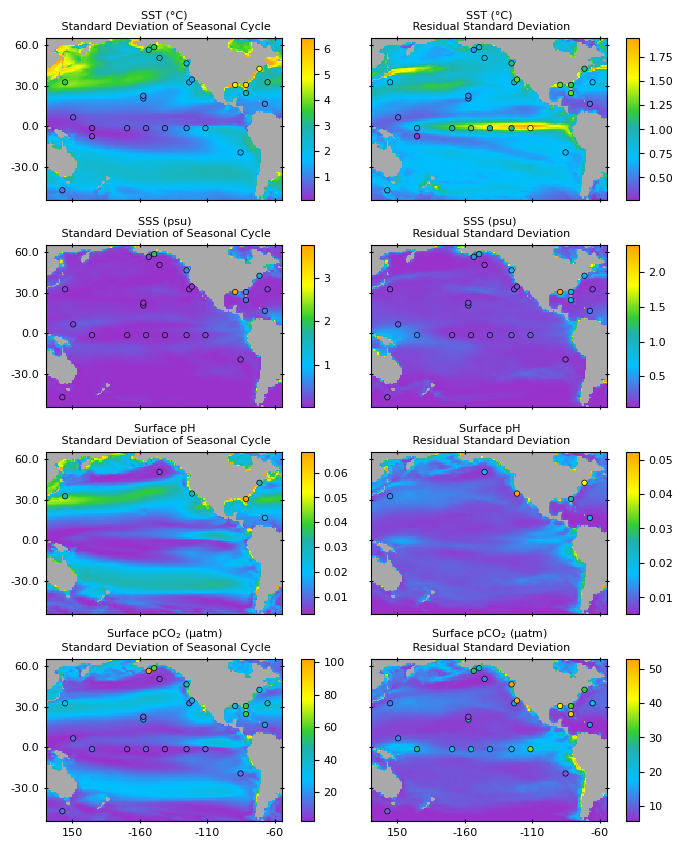

In [22]:
## combine
fig=plt.figure(figsize=(6.5,9))
ax0=fig.add_axes(rect=  [.05, .79,  .38,   .18])
ax0cb=fig.add_axes(rect=[.45, .79,  .02,  .18])
ax1=fig.add_axes(rect=  [.55,  .79,  .38,   .18])
ax1cb=fig.add_axes(rect=[.95, .79,  .02,  .18])
ax2=fig.add_axes(rect=  [.05, .56,   .38,   .18])
ax2cb=fig.add_axes(rect=[.45, .56,   .02,  .18])
ax3=fig.add_axes(rect=  [.55,  .56,   .38,   .18])
ax3cb=fig.add_axes(rect=[.95, .56,   .02,  .18])
ax4=fig.add_axes(rect=  [.05, .33,  .38,   .18])
ax4cb=fig.add_axes(rect=[.45, .33,  .02,  .18])
ax5=fig.add_axes(rect=  [.55,  .33,  .38,   .18])
ax5cb=fig.add_axes(rect=[.95, .33,  .02,  .18])
ax6=fig.add_axes(rect=  [.05, .1,   .38,   .18])
ax6cb=fig.add_axes(rect=[.45, .1,   .02,  .18])
ax7=fig.add_axes(rect=  [.55,  .1,   .38,   .18])
ax7cb=fig.add_axes(rect=[.95, .1,   .02,  .18])
v1=6500
cmap=cmocean.cm.gray
cmap.set_bad('darkgray')
cmap2=testcm#plt.get_cmap('rainbow')#cmocean.cm.thermal
cmap2.set_bad('darkgray')

shp=np.shape(seas[ivar])
xt=[149.5, 199.5, 249.5, 299.5]
xtl=_lofmt(np.interp(xt,np.arange(0,360),viz.lonvec1x1)).astype(int)
yt=[59.5, 89.5, 119.5,149.5]
ytl=np.interp(yt,np.arange(0,180),viz.latvec1x1)

def _dorowleft(ax,cbax,ivar,xtickLs,ytickLs):
    # tos, seasonal cycle std dev
    ix=(df.ivar==ivar)&~pd.isnull(df.var_seas_obs)
    dfi=df.loc[ix,['ii_2','jj_2','var_seas_obs',
                               'var_seas_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
    ax.set_aspect(1)
    x1=np.sqrt(dfi.var_seas_obs)
    x2=np.sqrt(dfi.var_seas_mod)
    vmin=min(np.min(x1),np.min(x2))
    vmax=max(np.max(x1),np.max(x2))
    m=ax.pcolormesh(np.arange(0,shp[1]),np.arange(0,shp[0]),np.sqrt(seas[ivar]),shading='auto',vmin=vmin,vmax=vmax,cmap=cmap2)
    m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
              s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
    cb=fig.colorbar(m,cax=cbax)
    ax.axis([130,305,35,155,])
    ax.set_xticks(xt,xtickLs)
    ax.set_yticks(yt,ytickLs)
    ax.set_title(f'{bc.dispNameUnits[ivar]}\n Standard Deviation of Seasonal Cycle')
    ax.tick_params(bottom=True,top=True,left=True,right=True,direction='inout')
    return

def _dorowright(ax,cbax,ivar,xtickLs,ytickLs):
    ix=(df.ivar==ivar)&~pd.isnull(df.vards_total_obs)
    dfi=df.loc[ix,['ii_2','jj_2','vards_total_obs',
                               'vards_total_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
    ax.set_aspect(1)
    x1=np.sqrt(dfi.vards_total_obs)
    x2=np.sqrt(dfi.vards_total_mod)
    vmin=min(np.min(x1),np.min(x2))
    vmax=max(np.max(x1),np.max(x2))
    m=ax.pcolormesh(np.arange(0,shp[1]),np.arange(0,shp[0]),np.sqrt(resid[ivar]),shading='auto',vmin=vmin,vmax=vmax,cmap=cmap2)
    m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
              s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
    cb=fig.colorbar(m,cax=cbax)
    ax.axis([130,305,35,155,])
    ax.set_xticks(xt,xtickLs)
    ax.set_yticks(yt,ytickLs)
    ax.set_title(f'{bc.dispNameUnits[ivar]}\n Residual Standard Deviation')
    ax.tick_params(bottom=True,top=True,left=True,right=True,direction='inout')
    return

_dorowleft(ax0,ax0cb,'tos',[],ytl)
_dorowright(ax1,ax1cb,'tos',[],[])

_dorowleft(ax2,ax2cb,'sos',[],ytl)
_dorowright(ax3,ax3cb,'sos',[],[])

_dorowleft(ax4,ax4cb,'phos',[],ytl)
_dorowright(ax5,ax5cb,'phos',[],[])

_dorowleft(ax6,ax6cb,'spco2',xtl,ytl)
_dorowright(ax7,ax7cb,'spco2',xtl,[])

fig.savefig('/home/ebo/OAPMSE/paperFigs/varMaps_Rev.pdf',dpi=400,bbox_inches='tight')
fig.savefig('/home/ebo/OAPMSE/paperFigs/varMaps_Rev.tif',dpi=400,bbox_inches='tight')

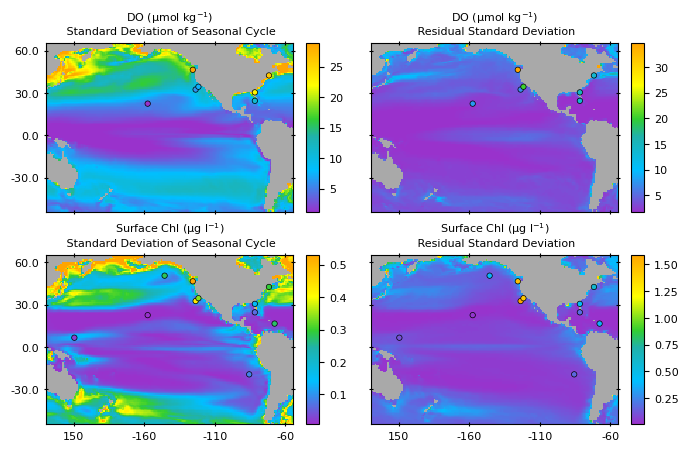

In [23]:
## combine
fig=plt.figure(figsize=(6.5,4.7))
ax0=fig.add_axes(rect=  [.05, .55,  .38,   .36])
ax0cb=fig.add_axes(rect=[.45, .55,  .02,  .36])
ax1=fig.add_axes(rect=  [.55,  .55,  .38,   .36])
ax1cb=fig.add_axes(rect=[.95, .55,  .02,  .36])
ax2=fig.add_axes(rect=  [.05, .1,   .38,   .36])
ax2cb=fig.add_axes(rect=[.45, .1,   .02,  .36])
ax3=fig.add_axes(rect=  [.55,  .1,   .38,   .36])
ax3cb=fig.add_axes(rect=[.95, .1,   .02,  .36])
v1=6500
cmap=cmocean.cm.gray
cmap.set_bad('darkgray')
cmap2=testcm#plt.get_cmap('rainbow')#cmocean.cm.thermal
cmap2.set_bad('darkgray')

_dorowleft(ax0,ax0cb,'o2os',[],ytl)
_dorowright(ax1,ax1cb,'o2os',[],[])

_dorowleft(ax2,ax2cb,'chlos',xtl,ytl)
_dorowright(ax3,ax3cb,'chlos',xtl,[])

fig.savefig('/home/ebo/OAPMSE/paperFigs/varMaps_o2_chl_Rev.png',dpi=400,bbox_inches='tight')